In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [18]:
df=pd.read_csv(r"C:\Users\Bloodhound\Downloads\Github\DataScience-AI-ML\fruit_data_with_colours\fruit_data_with_colours.csv")
print(df.to_string())

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [20]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [21]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['height', 'width','mass']] = scaler.fit_transform(df[['height', 'width','mass']])
print(df.head(10))

   fruit_label fruit_name fruit_subtype      mass     width    height  \
0            1      apple  granny_smith  0.405594  0.684211  0.507692   
1            1      apple  granny_smith  0.363636  0.578947  0.430769   
2            1      apple  granny_smith  0.349650  0.421053  0.492308   
3            2   mandarin      mandarin  0.034965  0.105263  0.107692   
4            2   mandarin      mandarin  0.027972  0.052632  0.092308   
5            2   mandarin      mandarin  0.013986  0.000000  0.046154   
6            2   mandarin      mandarin  0.013986  0.026316  0.046154   
7            2   mandarin      mandarin  0.000000  0.000000  0.000000   
8            1      apple      braeburn  0.356643  0.342105  0.584615   
9            1      apple      braeburn  0.335664  0.421053  0.461538   

   color_score  
0         0.55  
1         0.59  
2         0.60  
3         0.80  
4         0.79  
5         0.77  
6         0.81  
7         0.81  
8         0.92  
9         0.89  


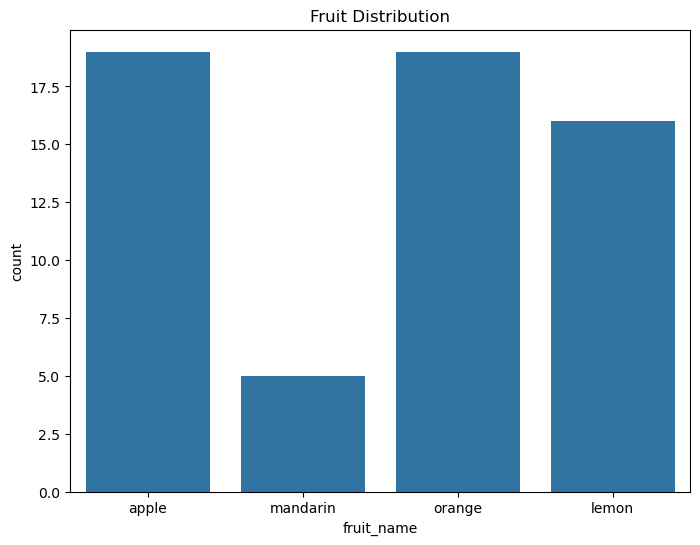

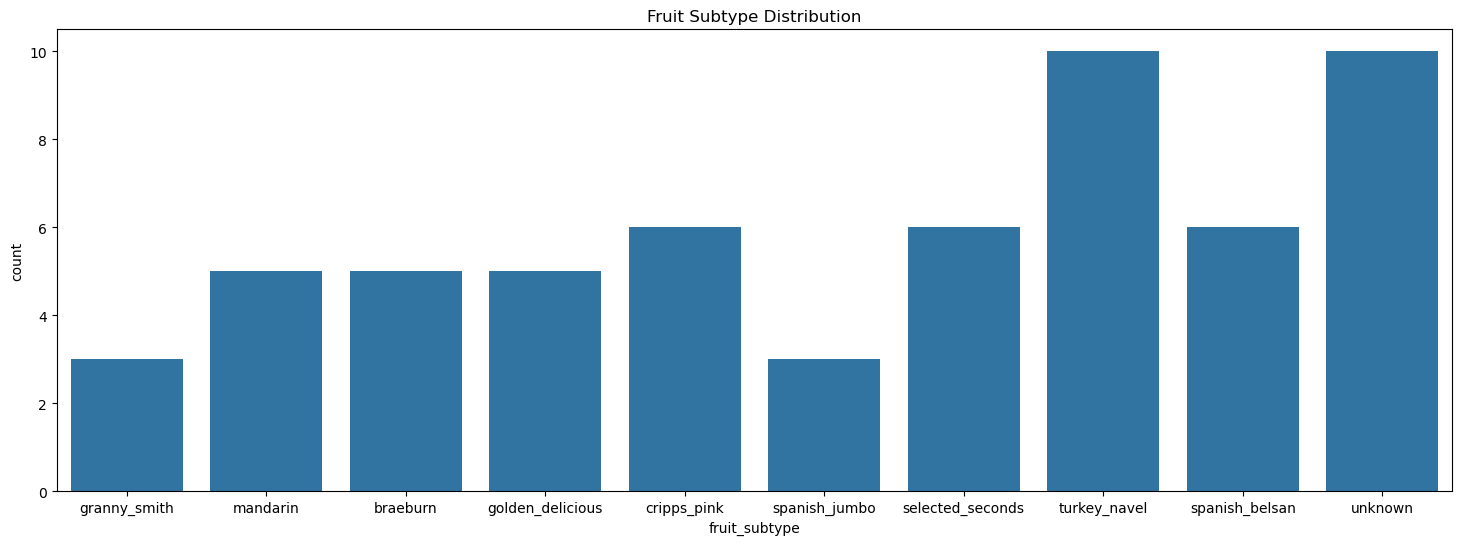

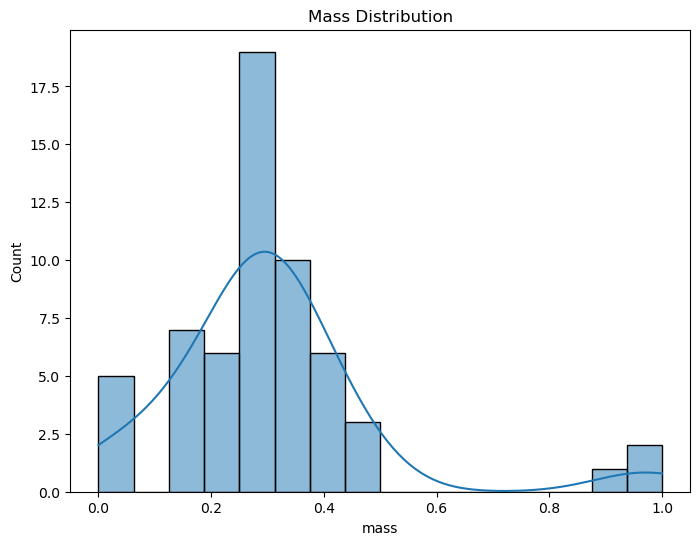

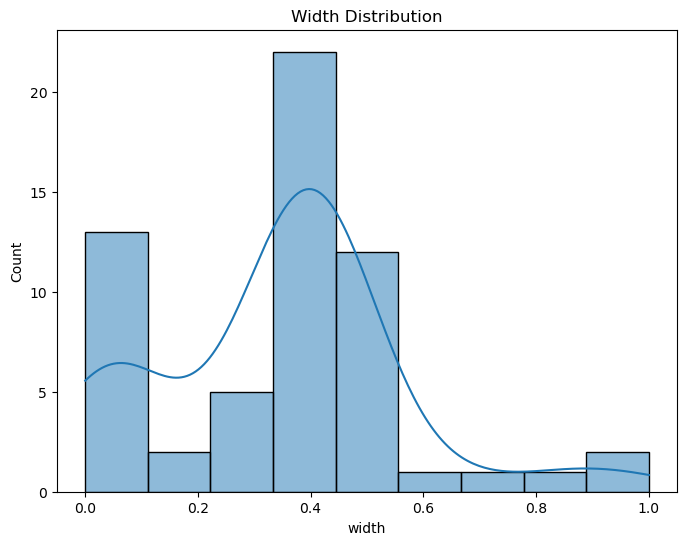

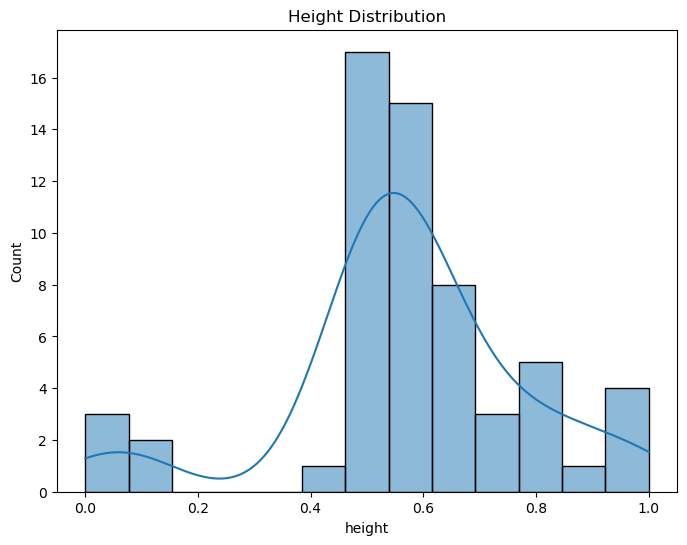

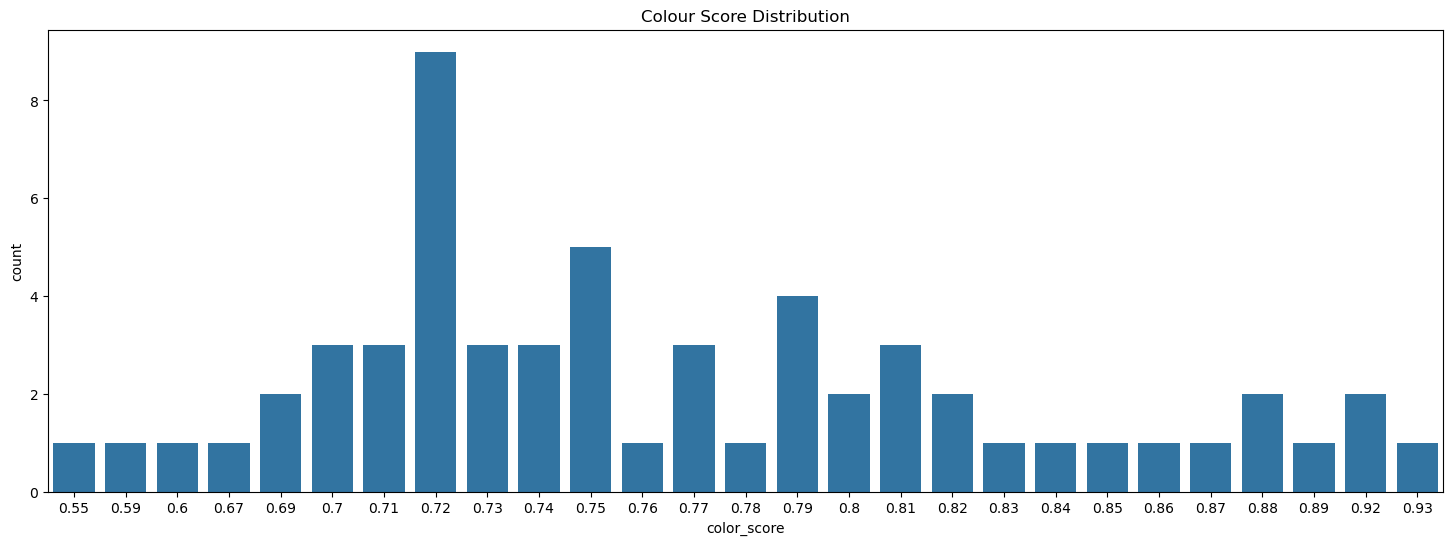

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fruit_name', data=df)
plt.title('Fruit Distribution')
plt.show()

plt.figure(figsize=(18,6))
sns.countplot(x='fruit_subtype', data=df)
plt.title('Fruit Subtype Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['mass'], kde=True)
plt.title('Mass Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['width'], kde=True)
plt.title('Width Distribution')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['height'], kde=True)
plt.title('Height Distribution')
plt.show()


plt.figure(figsize=(18,6))
sns.countplot(x='color_score', data=df)
plt.title('Colour Score Distribution')
plt.show()

In [24]:
X = df[['mass', 'width', 'height']]
y = df['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (47, 3)
y_train shape: (47,)
X_test shape: (12, 3)
y_test shape: (12,)


In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

Accuracy of the KNN classifier: 0.8333333333333334
              precision    recall  f1-score   support

       apple       0.67      0.67      0.67         3
       lemon       1.00      1.00      1.00         5
    mandarin       1.00      1.00      1.00         2
      orange       0.50      0.50      0.50         2

    accuracy                           0.83        12
   macro avg       0.79      0.79      0.79        12
weighted avg       0.83      0.83      0.83        12



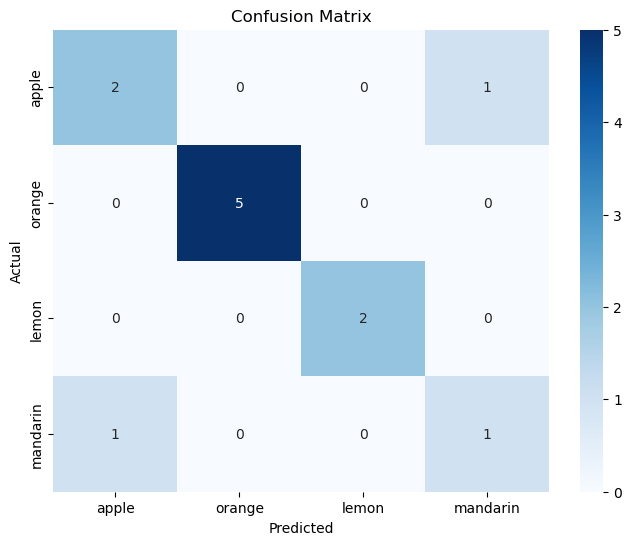

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['apple', 'orange','lemon','mandarin'], yticklabels=['apple', 'orange','lemon','mandarin'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# K=4 Cross Validation

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=4, shuffle=True, random_state=42)
accuracies_kfold = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_kfold.append(accuracy)

print("Accuracies for each fold:", accuracies_kfold)
print("Average accuracy:", np.mean(accuracies_kfold))

Accuracies for each fold: [0.8, 0.9333333333333333, 0.6, 0.9285714285714286]
Average accuracy: 0.8154761904761905
